In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

df = pd.read_csv('train.csv')

Matplotlib is building the font cache; this may take a moment.


# Context

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C


# Data quality assessment

In [4]:
df.drop(['PassengerId'], axis=1, inplace=True)
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [5]:
df.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

In [6]:
df['Family'] = df['SibSp'] + df['Parch']

df['is_female'] = np.where(df['Sex'] == "male", 0, 1)
df['has_cabin'] = np.where(df['Cabin'].isnull(), 0, 1)
df['has_ticket'] = np.where(df['Ticket'].isnull(), 0, 1)
df['has_age'] = np.where(df['Age'].isnull(), 0, 1)
df['has_fare'] = np.where(df['Fare'].isnull(), 0, 1)
df['has_embarked'] = np.where(df['Embarked'].isnull(), 0, 1)
df['cabin_letter'] = df['Cabin'].apply(lambda x: str(x)[0])

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

df['is_child'] = np.where(df['Age'] > 18, 0, 1)

df.loc[df['Age']<=19, 'age_group'] = '0_19'
df.loc[df['Age'].between(20,29), 'age_group'] = '20_29'
df.loc[df['Age'].between(30,39), 'age_group'] = '30_39'
df.loc[df['Age'].between(40,49), 'age_group'] = '40_49'
df.loc[df['Age'].between(50,59), 'age_group'] = '50_59'
df.loc[df['Age'].between(60,69), 'age_group'] = '60_69'
df.loc[df['Age']>69, 'age_group'] = '70+'

df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Family,is_female,has_cabin,has_ticket,has_age,has_fare,has_embarked,cabin_letter,is_child,age_group
0,1,1,"Oconnor, Frankie",male,38.355472,2,0,209245,27.14,C12239,...,2,0,1,1,0,1,1,C,0,30_39
1,0,3,"Bryan, Drew",male,38.355472,0,0,27323,13.35,NaN,...,0,0,0,1,0,1,1,n,0,30_39
2,0,3,"Owens, Kenneth",male,0.330000,1,2,CA 457703,71.29,NaN,...,3,0,0,1,1,1,1,n,1,0_19
3,0,3,"Kramer, James",male,19.000000,0,0,A. 10866,13.04,NaN,...,0,0,0,1,1,1,1,n,0,0_19
4,1,3,"Bond, Michael",male,25.000000,0,0,427635,7.76,NaN,...,0,0,0,1,1,1,1,n,0,20_29
5,0,2,"Sassano, Jonathan",male,35.000000,0,0,13363,6.71,NaN,...,0,0,0,1,1,1,1,n,0,30_39
6,0,3,"Conway, Jose",male,7.000000,0,0,A/5,9.77,NaN,...,0,0,0,1,1,1,1,n,1,0_19
7,1,3,"Werner, Linda",female,6.000000,1,2,434426,31.50,NaN,...,3,1,0,1,1,1,1,n,1,0_19
8,0,1,"Wardlaw, Michael",male,27.000000,2,1,474849,73.02,A7253,...,3,0,1,1,1,1,1,A,0,20_29
9,0,2,"Greigo, Rudy",male,66.000000,0,0,6981,9.14,D2969,...,0,0,1,1,1,1,1,D,0,60_69


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Survived      100000 non-null  int64  
 1   Pclass        100000 non-null  int64  
 2   Name          100000 non-null  object 
 3   Sex           100000 non-null  object 
 4   Age           100000 non-null  float64
 5   SibSp         100000 non-null  int64  
 6   Parch         100000 non-null  int64  
 7   Ticket        95377 non-null   object 
 8   Fare          100000 non-null  float64
 9   Cabin         32134 non-null   object 
 10  Embarked      99750 non-null   object 
 11  Family        100000 non-null  int64  
 12  is_female     100000 non-null  int32  
 13  has_cabin     100000 non-null  int32  
 14  has_ticket    100000 non-null  int32  
 15  has_age       100000 non-null  int32  
 16  has_fare      100000 non-null  int32  
 17  has_embarked  100000 non-null  int32  
 18  cabin

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,is_female,has_cabin,has_ticket,has_age,has_fare,has_embarked,is_child
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933,0.852250,0.43886,0.321340,0.953770,0.967080,0.998660,0.997500,0.126330
std,0.494753,0.837727,18.009589,0.862566,0.950076,69.54218,1.412792,0.49625,0.466993,0.209984,0.178428,0.036582,0.049938,0.332223
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,2.000000,38.355472,0.000000,0.000000,24.49000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.56000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000,17.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split data to numeric and categorical features

In [9]:
num_features = ["Age", "SibSp", "Parch", "Fare", "Family"]
nf = df[["Survived"] + num_features]
nf.head()

,Survived,Age,SibSp,Parch,Fare,Family
0,1,38.355472,2,0,27.14,2
1,0,38.355472,0,0,13.35,0
2,0,0.330000,1,2,71.29,3
3,0,19.000000,0,0,13.04,0
4,1,25.000000,0,0,7.76,0


In [10]:
cat_features = ["Pclass",
                "Embarked",
                "has_cabin", 
                "has_ticket", 
                "has_age", 
                "has_fare", 
                "has_embarked",
                "is_female",
                "is_child",
                "cabin_letter",
                "age_group"
               ]

cf = df[["Survived"] + cat_features]
cf.head()

,Survived,Pclass,Embarked,has_cabin,has_ticket,has_age,has_fare,has_embarked,is_female,is_child,cabin_letter,age_group
0,1,1,S,1,1,0,1,1,0,0,C,30_39
1,0,3,S,0,1,0,1,1,0,0,n,30_39
2,0,3,S,0,1,1,1,1,0,1,n,0_19
3,0,3,S,0,1,1,1,1,0,0,n,0_19
4,1,3,S,0,1,1,1,1,0,0,n,20_29


In [11]:
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,Family,is_female,has_cabin,has_ticket,has_age,has_fare,has_embarked,is_child
Survived,,,,,,,,,,,,,
0,2.316744,36.764407,0.403348,0.435379,32.661908,0.838727,0.221228,0.219778,0.961381,0.966169,0.998724,0.997763,0.125555
1,1.826179,40.484109,0.390120,0.480222,59.003664,0.870342,0.730023,0.457217,0.943587,0.968298,0.998574,0.997148,0.127367


# Data exploration

<AxesSubplot:>

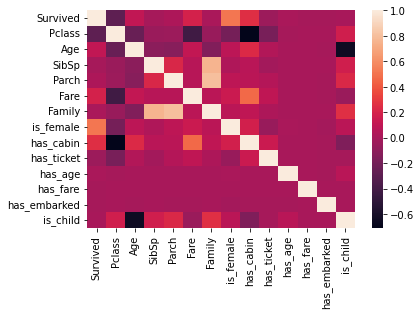

In [12]:
sns.heatmap(df.corr(method='pearson'))

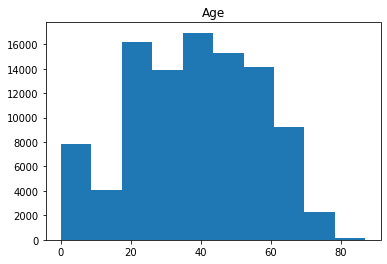

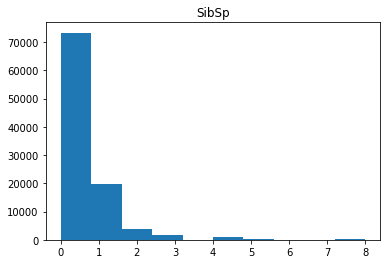

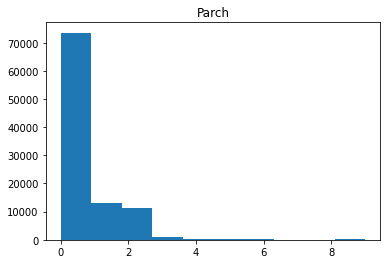

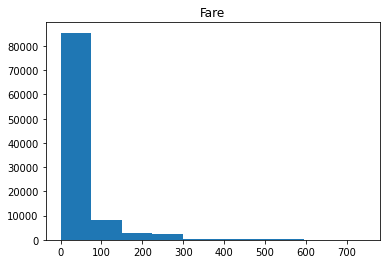

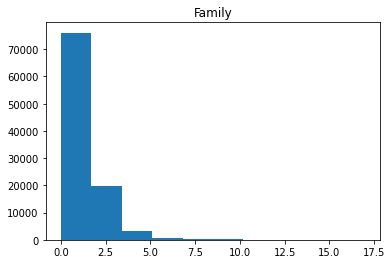

In [13]:
for i in num_features:
    plt.figure(i)
    plt.hist(df[i])
    plt.title(i)
    plt.show()

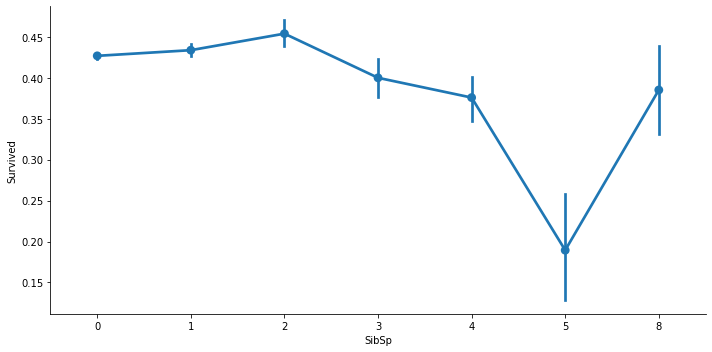

In [14]:
sns.catplot(x='SibSp', y='Survived', data=df, kind="point", aspect=2)

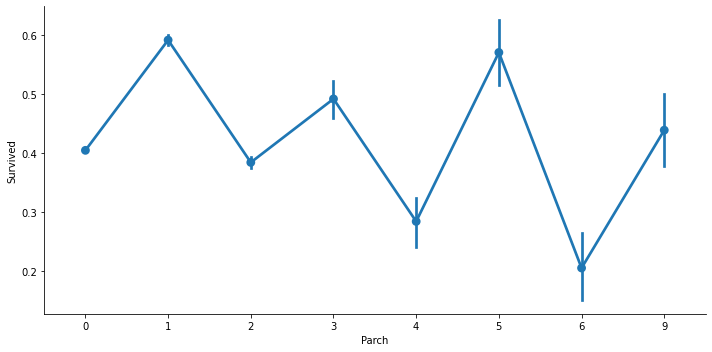

In [15]:
sns.catplot(x='Parch', y='Survived', data=df, kind="point", aspect=2)

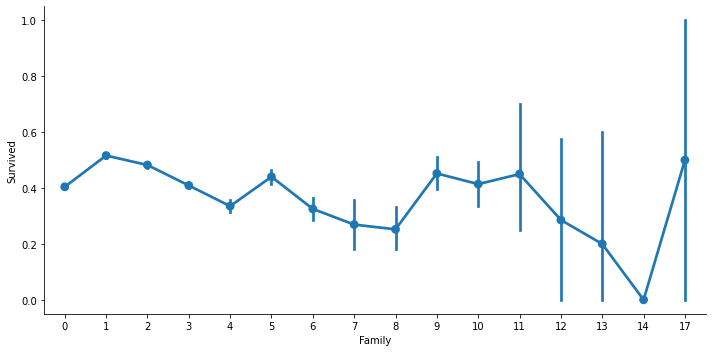

In [16]:
sns.catplot(x='Family', y='Survived', data=df, kind="point", aspect=2)

<Figure size 432x288 with 0 Axes>

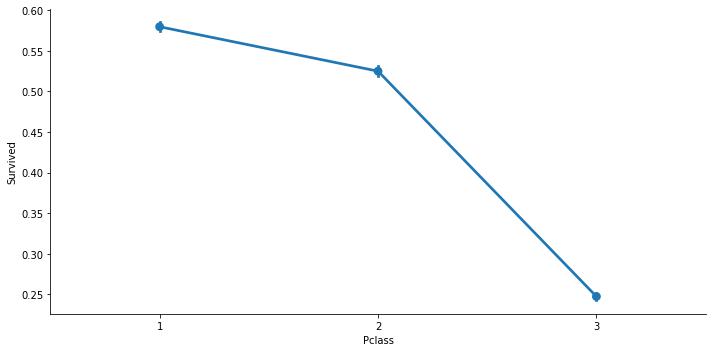

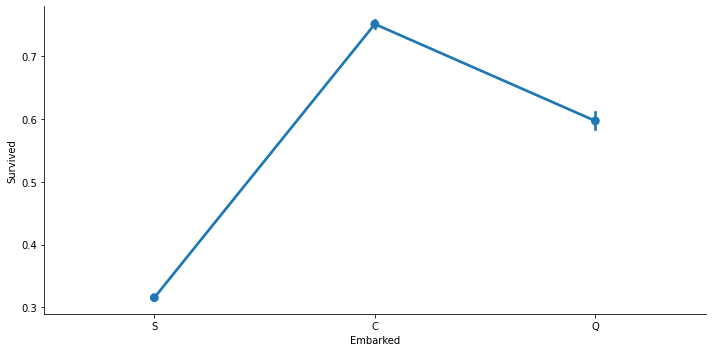

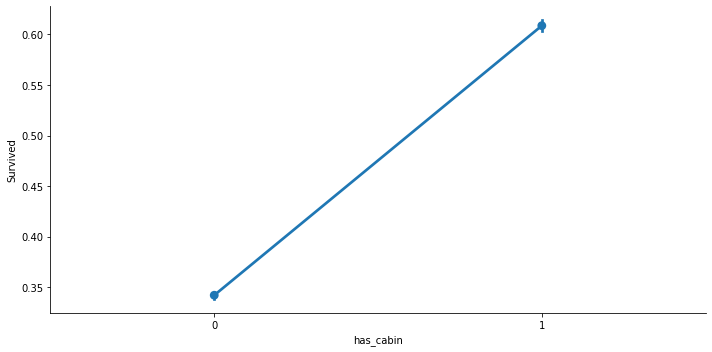

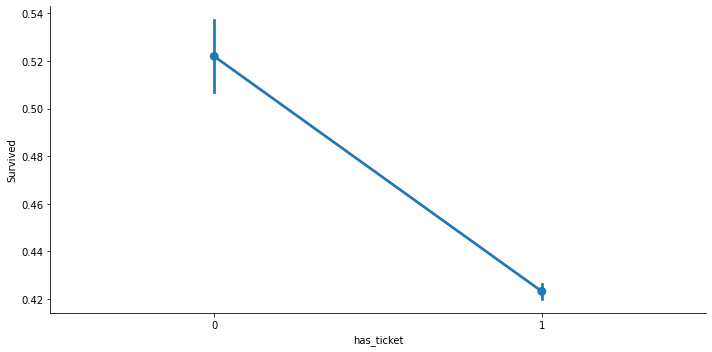

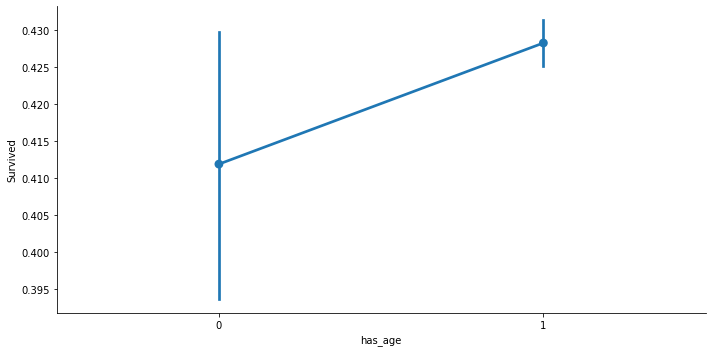

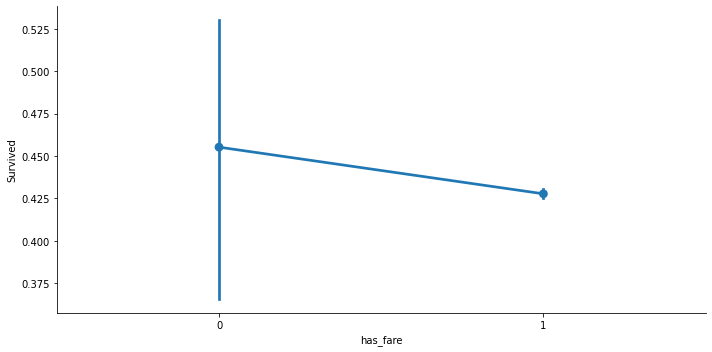

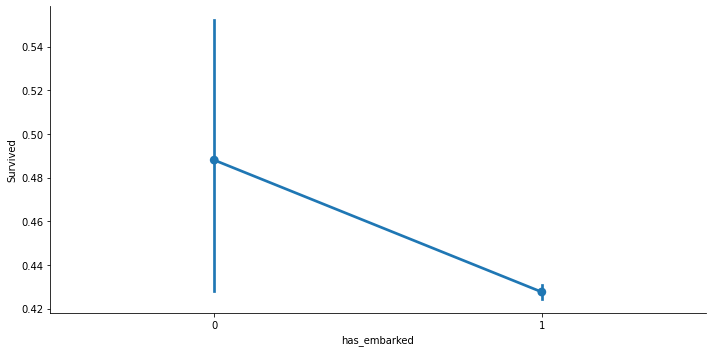

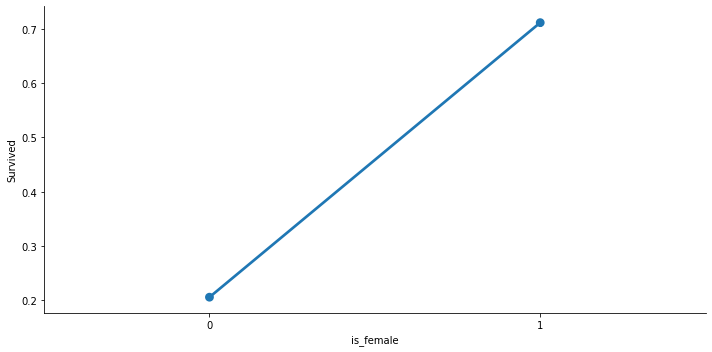

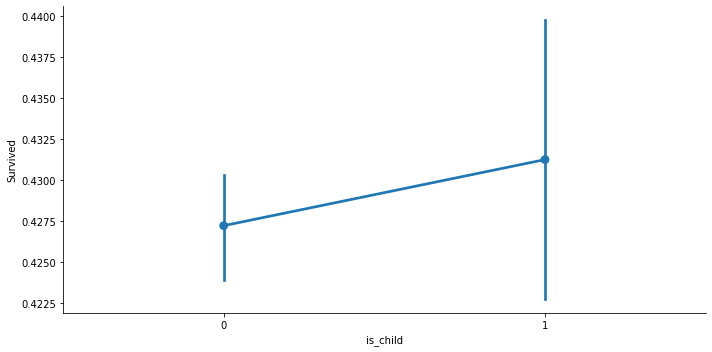

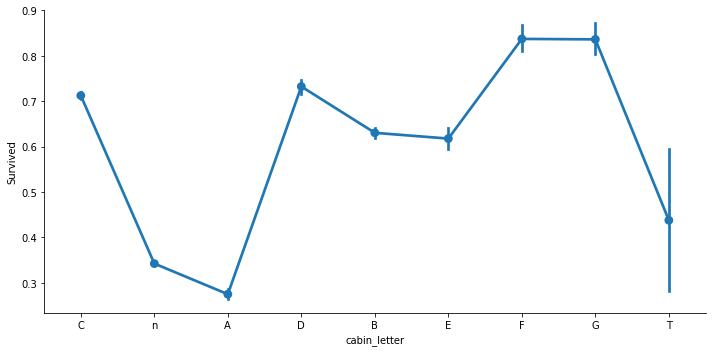

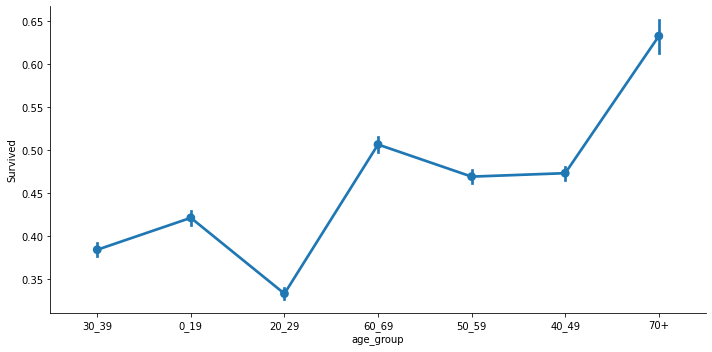

In [17]:
for i, col in enumerate(cat_features):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=df, kind="point", aspect=2,)

- C = Cherbourg
- Q = Queenstown
- S = Southampton



![Image of Yaktocat](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/TitanicRoute.svg/1200px-TitanicRoute.svg.png)

**boarding order**: S -> C -> Q

In [18]:
df.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,15786,3852,24117
male,6401,1572,48022


In [19]:
df.pivot_table('Survived', index='has_cabin', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
has_cabin,,,
0,9208,1402,57094
1,12979,4022,15045


In [20]:
df.pivot_table('Age', index='Survived', columns='has_ticket', aggfunc='count')

has_ticket,0,1
Survived,,
0,2210,55016
1,2413,40361


In [21]:
df.pivot_table('Age', index='Survived', columns='cabin_letter', aggfunc='count')

cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,4575,2751,3403,974,669,108,79,18,44649
1,1732,4688,8422,2663,1080,555,403,14,23217


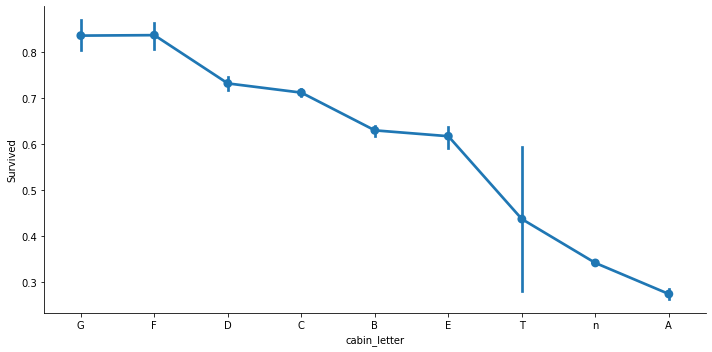

In [22]:
sns.catplot(x='cabin_letter', y='Survived', data=df, kind="point", aspect=2, order=["G", "F", "D", "C", "B", "E", "T", "n", "A"])

In [23]:
df.groupby('Embarked').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,is_female,has_cabin,has_ticket,has_age,has_fare,has_embarked,is_child
Embarked,,,,,,,,,,,,,,
C,0.751296,1.654978,41.735379,0.366972,0.479831,71.507992,0.846802,0.711498,0.584982,0.989273,0.967053,0.998513,1.0,0.103484
Q,0.596976,1.461283,49.671516,0.287058,0.423304,73.341703,0.710361,0.710177,0.741519,0.989860,0.965524,0.998525,1.0,0.046460
S,0.315294,2.294709,36.461406,0.415628,0.448939,33.213691,0.864567,0.334313,0.208556,0.940102,0.967119,0.998725,1.0,0.139439


# Summary

Факторы наиболее значимо повышающие выживаемость:
1. возраст, наибольшая выживаемость в группе 70+
1. высокая цена билета, выжившие в среднем заплатили за свой билет в 2 раза больше
1. женский пол, 73% выживших - женщины
1. 1й класс билета
1. наличие записи о каюте положительно влияет на выживаемость
1. каюты с префиксами G, F, D наиболее повышают выживаемость
1. отсутствие записи о билете положительно влияет на выживаемость

Факторы понижающие выживаемость:
1. возраст до 20-29 лет
1. дешевый билет
1. мужской пол
1. 3й класс билета
1. отсутствие записи о каюте
1. каюта с префиксом А

Примечания:
- город посадки напрямую не влияет на выживаемость, но в городе Southampton на борт принято в 2 раза больше мужчин, а в Cherbourg - в 2.5 раза больше женщин, что сильно влияет на график
- количество родственников на борту незначительно влияет на выживаемость